
# Diabetes Dataset Analysis

## Introduction
This analysis focuses on a dataset originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict whether a patient has diabetes based on diagnostic measurements. All patients are females of at least 21 years old of Pima Indian heritage.

## Steps in Analysis
1. Data Overview
2. Data Cleaning and Preparation
3. Exploratory Data Analysis (EDA)
4. Visualization
5. Interpretation

Let's start by installing necessary packages then move on to loading and overviewing the data.
    

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
diabetes_data.head()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



## Data Cleaning
We'll check for missing values and handle zero values in critical columns like 'Glucose', 'BloodPressure', etc.
    

In [3]:

# Check for missing values and basic statistical details
missing_values = diabetes_data.isnull().sum()
basic_stats = diabetes_data.describe()

missing_values, basic_stats
    

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
           

In [4]:

# Imputing zero values with the median of the respective columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_impute:
    median_value = diabetes_data[column].median()
    diabetes_data[column].replace(0, median_value, inplace=True)

# Checking the basic statistics again to ensure the changes
diabetes_data.describe()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



## Exploratory Data Analysis (EDA) and Visualization
We'll now explore the distribution of various variables and their relationship with the outcome (diabetes diagnosis).
    

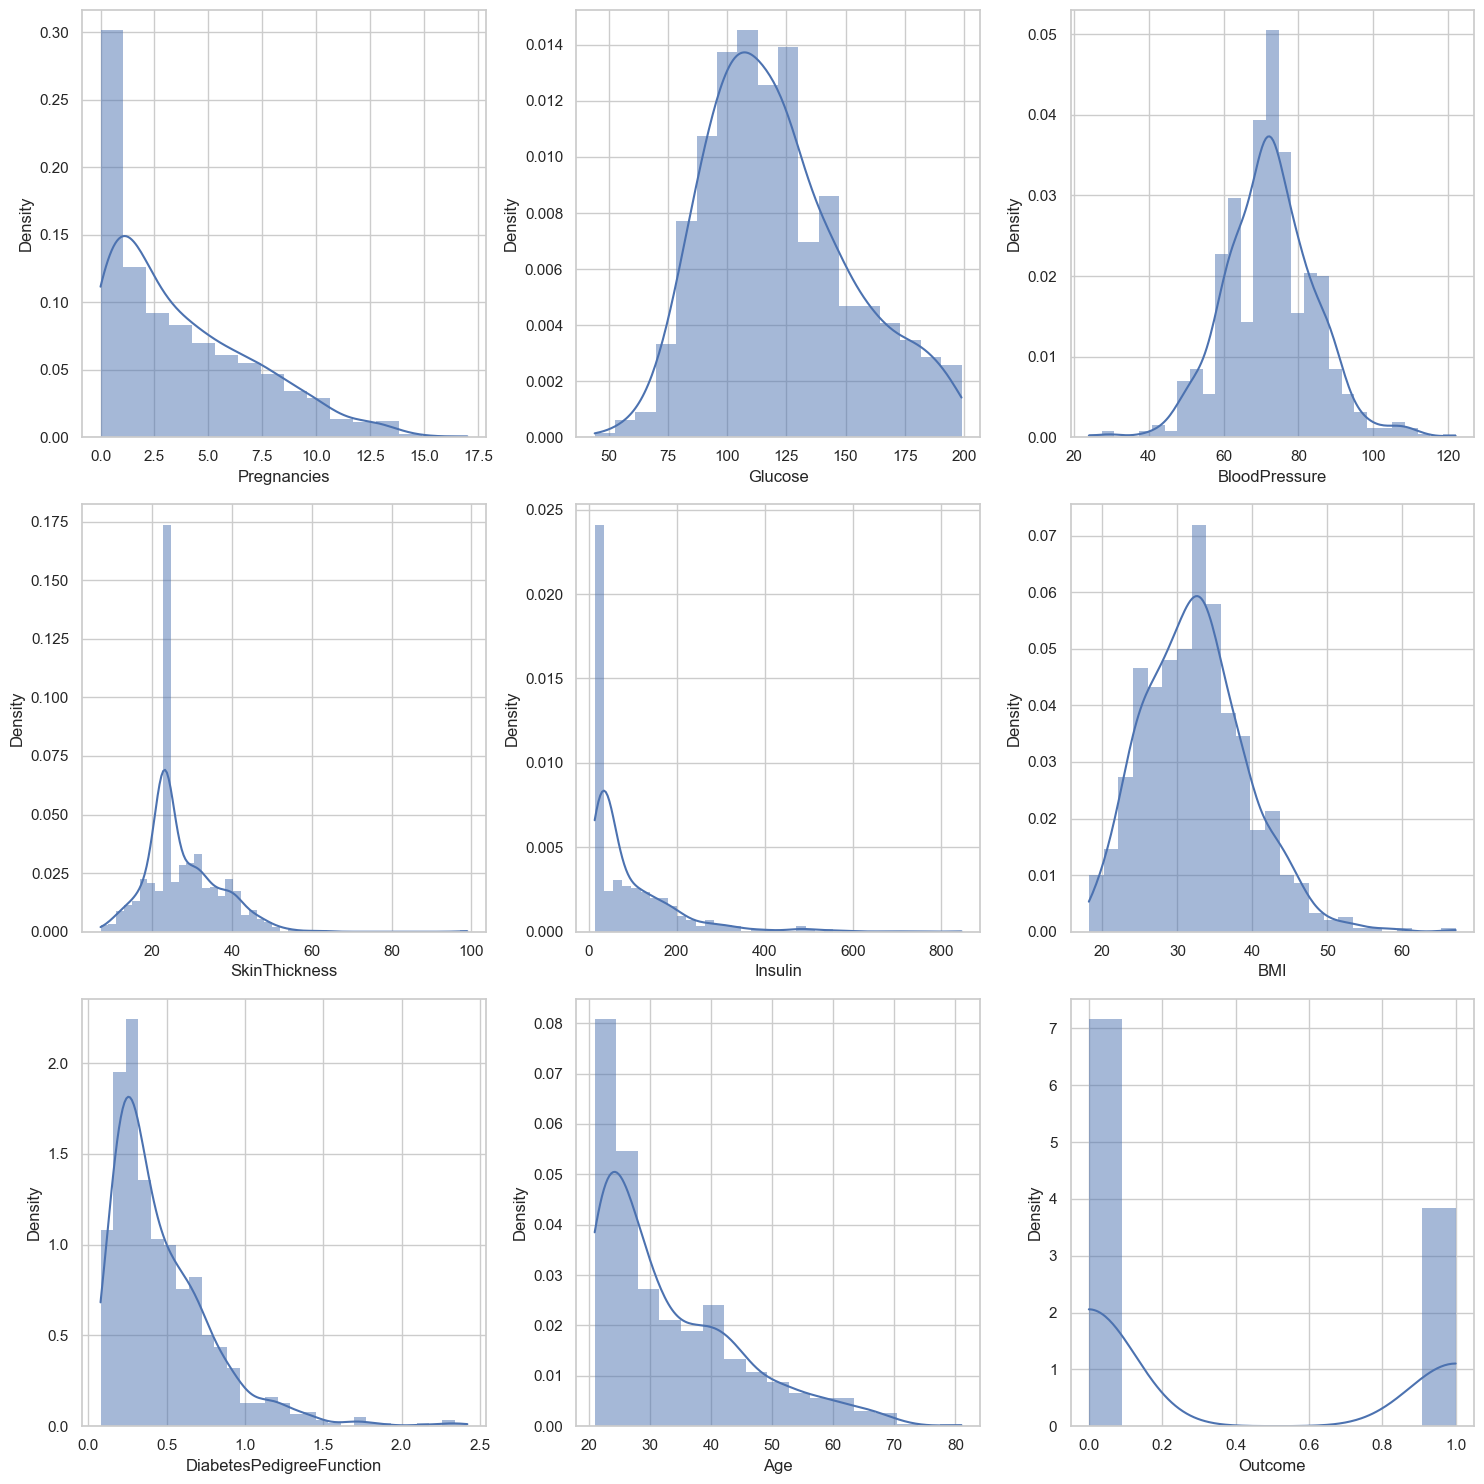

In [5]:

# Setting plot style
sns.set(style="whitegrid")

# Creating subplots for histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# List of columns for plotting
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
           'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Plotting histograms
for i, col in enumerate(columns):
    sns.histplot(diabetes_data[col], ax=axes[i//3, i%3], kde=True, stat="density", linewidth=0)

# Adjusting the layout
plt.tight_layout()

# Showing the plots
plt.show()
    

<Figure size 1200x800 with 0 Axes>

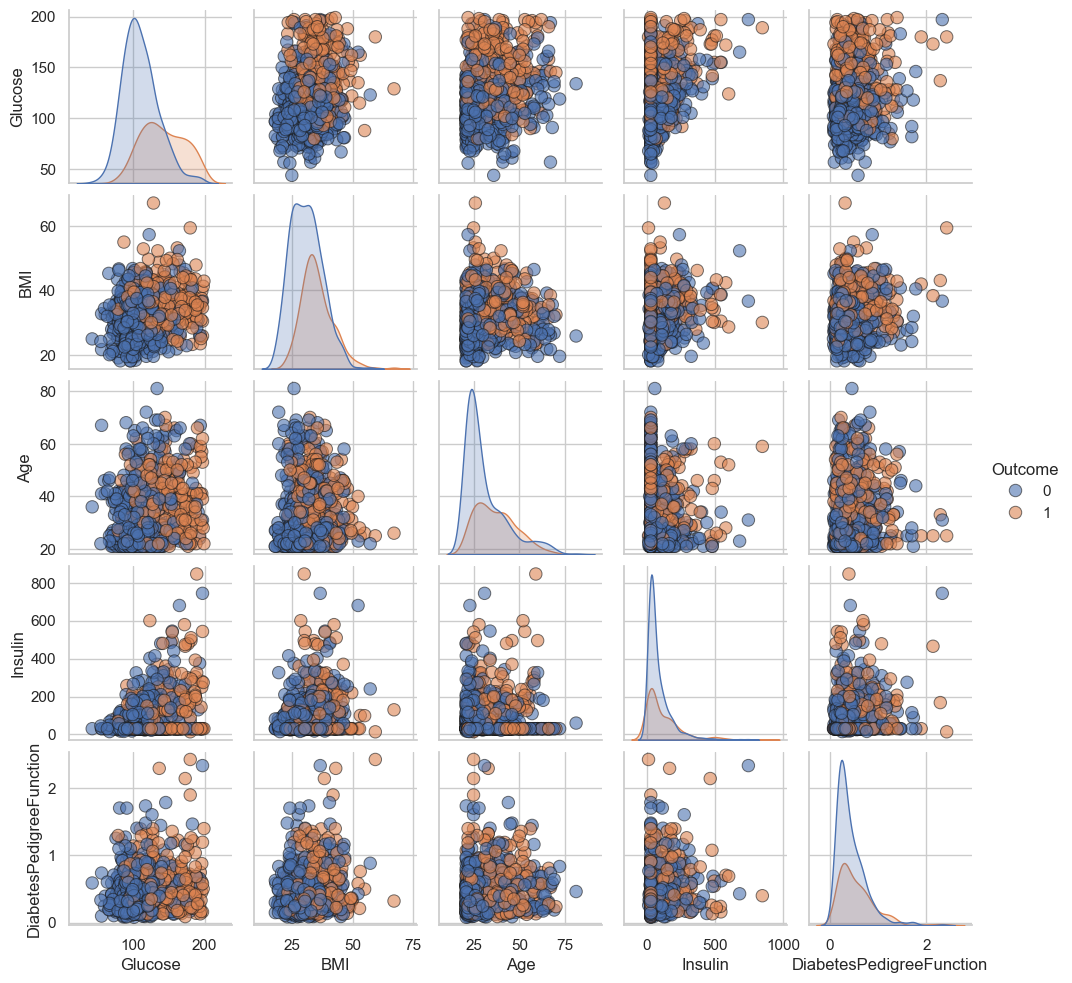

In [7]:

# Pairplot for selected variables with hue set to 'Outcome'
plt.figure(figsize=(12, 8))
selected_columns = ['Glucose', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(diabetes_data[selected_columns], hue='Outcome', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2)
plt.show()
    


## Interpretation of Results

The scatter plots reveal relationships between pairs of variables and their impact on diabetes diagnosis.


From the analysis and visualizations, we observe that:

#### 1. **Glucose Levels Are Key Indicators**
- Higher blood glucose levels are a strong indicator of diabetes. This aligns with medical knowledge where elevated glucose is a hallmark of diabetes, particularly Type 2 diabetes.

#### 2. **Body Mass Index (BMI) and Diabetes**
- The data shows a clear trend where individuals with higher BMI values tend to have diabetes more often. This suggests a strong link between obesity and the risk of developing diabetes, a well-known fact in diabetes research and treatment.

#### 3. **Age Factor**
- The risk of diabetes increases with age. This is evident in the data, where older individuals show a higher prevalence of diabetes. It implies the importance of monitoring blood sugar levels as one ages.

#### 4. **Family History Matters**
- The Diabetes Pedigree Function, which provides a measure of expected genetic influence on the patient's diabetes risk, shows that a family history of diabetes could increase an individual's risk. This highlights the role of genetics in diabetes.

#### 5. **Insulin Levels**
- While not as clear-cut as glucose levels or BMI, higher insulin levels are seen more frequently in individuals with diabetes. This could be indicative of insulin resistance, a condition where the body doesn't respond well to insulin, common in Type 2 diabetes.

### **Where This Data and Interpretation Might Be Used**

#### 1. **Public Health Policies**
- Understanding these risk factors can help in formulating public health policies. For instance, creating awareness campaigns about the importance of maintaining a healthy BMI to reduce the risk of diabetes.

#### 2. **Healthcare Screening Programs**
- Hospitals and clinics can use this data to develop screening programs. Targeting individuals with higher BMIs, older age groups, or those with a family history of diabetes for early screening could lead to early detection and better management.

#### 3. **Personalized Medicine**
- This data supports the move towards personalized medicine, where treatment and prevention strategies are tailored to individual risk factors such as age, BMI, family history, and glucose levels.

#### 4. **Educational Purposes**
- This analysis can be used in educational settings to teach students about the importance of data in understanding health conditions like diabetes.

#### 5. **Research and Development**
- Pharmaceutical companies and research institutions might use these insights to guide their research into new treatments or interventions for diabetes.

#### 6. **Lifestyle Modification Programs**
- The clear link between BMI and diabetes underscores the importance of lifestyle interventions. Programs aimed at diet and physical activity could use this data to motivate and guide participants.

